In [2]:
import numpy as np
import sys
!{sys.executable} -m pip install opencv-python
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img=cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

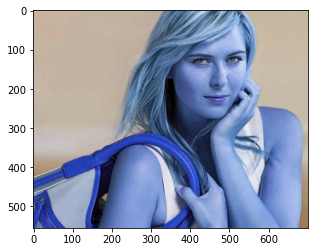

In [7]:
plt.imshow(img)

In [11]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

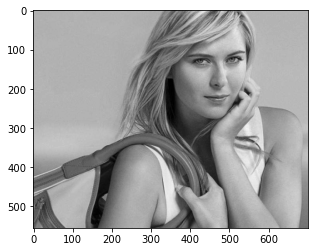

In [13]:
plt.imshow(gray, cmap='gray')

In [14]:
facecascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
face=facecascade.detectMultiScale(gray,1.3,5)
face

array([[352,  38, 233, 233]])

In [15]:
(x,y,w,h)=face[0]
x,y,w,h

(352, 38, 233, 233)

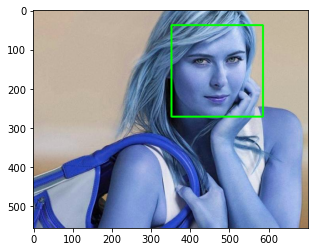

In [32]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(face_img)

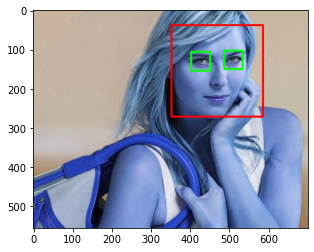

In [33]:
eyecascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
cv2.destroyAllWindows()
for(x,y,w,h) in face:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eye=eyecascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eye:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

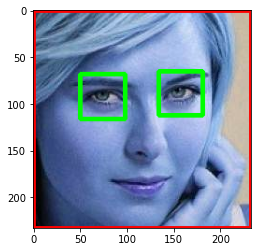

In [34]:
plt.imshow(roi_color,cmap='gray')

In [42]:
cropped=np.array(roi_color)
cropped.shape

(233, 233, 3)

In [43]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    
    imArray =  np.float32(imArray)   
    imArray /= 255;
     
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

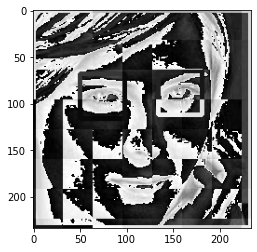

In [48]:
im_haar = w2d(cropped,'db1',5)
plt.imshow(im_haar, cmap='gray')

In [51]:
def getCroppedImageIf2Eyes(image_path):
    facecascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    eyecascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = facecascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyecascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

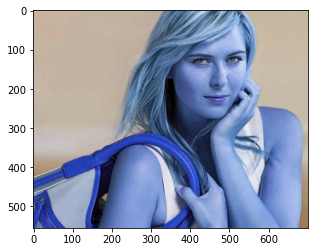

In [52]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

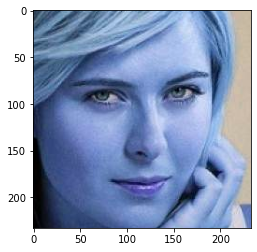

In [53]:
cropped_image = getCroppedImageIf2Eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

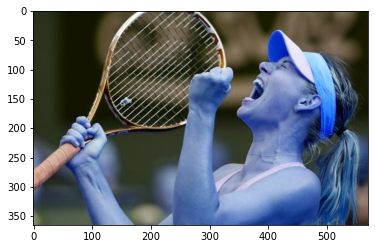

In [54]:
obstructedImage=cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(obstructedImage)

In [55]:
croppedImageNo2Eyes = getCroppedImageIf2Eyes('./test_images/sharapova2.jpg')
croppedImageNo2Eyes

In [56]:
pathToData = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [57]:
import os
imgDirs=[]
for entry in os.scandir(pathToData):
    if entry.is_dir():
        imgDirs.append(entry.path)
imgDirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [58]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [59]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in imgDirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=getCroppedImageIf2Eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder: ", cropped_folder)
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

generating cropped images in folder:  ./dataset/cropped/lionel_messi
generating cropped images in folder:  ./dataset/cropped/maria_sharapova
generating cropped images in folder:  ./dataset/cropped/roger_federer
generating cropped images in folder:  ./dataset/cropped/serena_williams
generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [60]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [61]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [63]:
X=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
                 

In [64]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(186, 4096)

In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7872340425531915

In [67]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.71      0.71      0.71         7
           2       0.67      0.67      0.67         6
           3       1.00      0.70      0.82        10
           4       0.81      0.93      0.87        14

    accuracy                           0.79        47
   macro avg       0.78      0.76      0.77        47
weighted avg       0.80      0.79      0.79        47



In [68]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [69]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [70]:
   scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df 

,model,best_score,best_params
0,svm,0.755291,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.625132,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.776984,{'logisticregression__C': 1}


In [71]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [72]:
best_estimators['svm'].score(X_test,y_test)

0.7872340425531915

In [98]:
best_estimators['random_forest'].score(X_test,y_test)

0.7659574468085106

In [99]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7872340425531915

In [104]:
best_clf=best_estimators['logistic_regression']

In [105]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,best_clf.predict(X_test))
matrix

array([[10,  0,  0,  0,  0],
       [ 1,  5,  0,  1,  0],
       [ 0,  1,  4,  1,  0],
       [ 0,  2,  1,  7,  0],
       [ 1,  1,  1,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'truth')

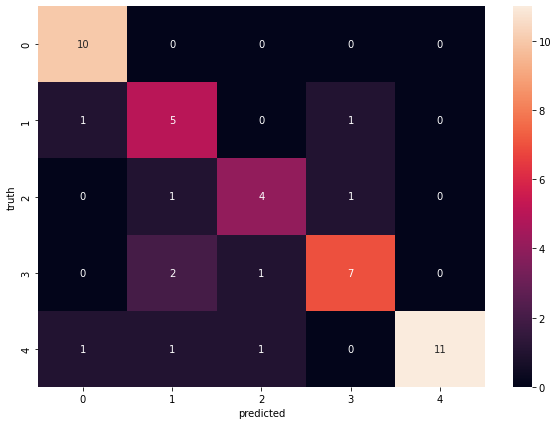

In [106]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(matrix,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [107]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [108]:
!pip install joblib
import joblib
joblib.dump(best_clf,"saved.pkl")

['saved.pkl']

In [109]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))